# Exploratory Data Analysis and WordCloud Creation
This notebook analyzes leni_tweets_oct4-9.csv and mainly aims to show publicly available historical data of users and top languages, usernames, words and hashtags used.

**DISCLAIMER:** Some tweets may not reflect here due to privacy restrictions of Twitter profiles. The datetime used is based on the Coordinated Universal Time (UTC).

**INSIGHTS BASED ON SCRAPED DATA FROM OCT. 4-9:**
- First tweet with hashtag of #LetLeniLead came from 'gentlemarv_' at 2021-10-04 00:01:20+00:00 (UTC)
- There are total of 44,321 tweets containing #LetLeniLead
- English is the most used language (machine generated, assumed language of the tweet) at 15,590 tweets
- Peak date is 2021-10-07 with 37,580 tweets
- 'FelixVBautista' has the most number of tweets containing the hashtag (199 tweets) 
- 'gabpangilinan' has the most number of tweets of a verified user containing the hashtag at (6 tweets)
- Most tweets came from accounts created in 2021 (7,861 tweets)
- More insights and visualizations below

## Exploratory Data Analysis (Whole)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

all_tweets_df = pd.read_csv("leni_tweets_oct4-9.csv")

In [2]:
all_tweets_df.head()

,Unnamed: 0,Datetime,Text,Language,Username,Verified,AccountCreated,Followers,Following,MentionedUsers
0,0,2021-10-04 23:59:14+00:00,@gmanews Hindi kami boboto sa Corrupt. Sinungh...,tl,saudiboy2,False,2010-10-24 11:30:27+00:00,410,1433,"[User(username='gmanews', id=39453212, display..."
1,1,2021-10-04 23:43:52+00:00,HAPPY OCTOBER 5TH MGA KUMARE!!!! #LetLeniLead ...,tl,plinthcedd,False,2017-09-30 11:23:44+00:00,201,95,NaN
2,2,2021-10-04 23:43:38+00:00,OCTOBER 5 NA PALA\n\n#LeniforPresident2022\n#L...,tl,holyalgae,False,2019-12-08 15:09:32+00:00,181,174,NaN
3,3,2021-10-04 23:31:51+00:00,Yizzzz!\n#LetLeniLead \n#LetLeniLead2022 https...,und,speaksnow8,False,2011-05-23 09:18:57+00:00,650,648,NaN
4,4,2021-10-04 23:15:44+00:00,Magandang umaga! ✨#LetLeniLead✨,tl,anma_arte,False,2013-10-17 20:46:54+00:00,548,691,NaN


In [3]:
all_tweets_df.shape

(44321, 10)

In [4]:
all_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44321 entries, 0 to 44320
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      44321 non-null  int64 
 1   Datetime        44321 non-null  object
 2   Text            44321 non-null  object
 3   Language        44321 non-null  object
 4   Username        44321 non-null  object
 5   Verified        44321 non-null  bool  
 6   AccountCreated  44321 non-null  object
 7   Followers       44321 non-null  int64 
 8   Following       44321 non-null  int64 
 9   MentionedUsers  7524 non-null   object
dtypes: bool(1), int64(3), object(6)
memory usage: 3.1+ MB


In [5]:
all_tweets_df["Language"].value_counts()

# und - can be mixed languages (ex: taglish)

en     15590
tl     13454
und    13180
in       556
et       320
es       262
hu       119
cy       103
it        82
pl        68
ht        63
pt        59
fr        51
da        51
nl        50
tr        50
sl        48
ca        36
no        28
lv        23
de        20
hi        17
lt        17
ro        17
eu        15
sv        10
is         9
fi         8
ko         7
cs         4
ja         2
zh         1
vi         1
Name: Language, dtype: int64

Text(0, 0.5, '')

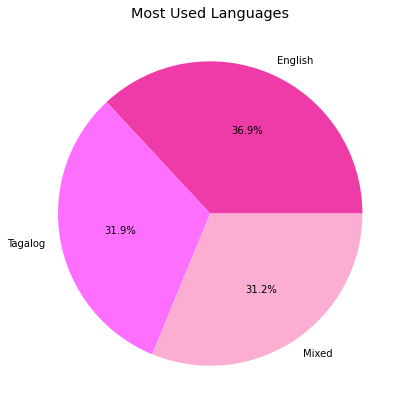

In [65]:
all_tweets_df["Language"].value_counts().head(3).plot(kind="pie", labels=["English", "Tagalog", "Mixed"], autopct="%.1f%%",
                                                     colors=["#ef3ba7", "#FF6FFF", "#FBAED2"], title="Most Used Languages",
                                                     figsize=(7,7))
plt.ylabel("")

In [78]:
pd.DatetimeIndex(all_tweets_df["Datetime"]).day.value_counts()

7    37580
8     3691
5     1253
6     1174
4      623
Name: Datetime, dtype: int64

([<matplotlib.axis.XTick at 0x26b10c96e20>,
 [Text(0, 0, 'Oct. 4'),
  Text(1, 0, 'Oct. 5'),
  Text(2, 0, 'Oct. 6'),
  Text(3, 0, 'Oct. 7'),
  Text(4, 0, 'Oct. 9')])

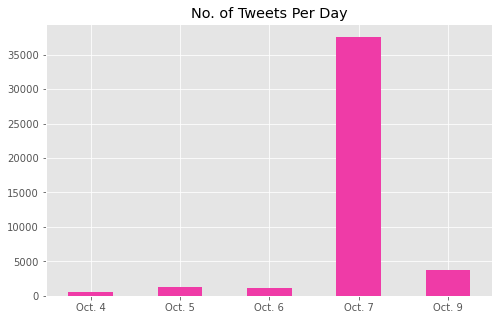

In [63]:
pd.DatetimeIndex(all_tweets_df["Datetime"]).day.value_counts().sort_index().plot(kind="bar", color="#ef3ba7", 
                                                                                 title="No. of Tweets Per Day", figsize=(8,5))
plt.xticks(ticks=range(5), labels=["Oct. 4", "Oct. 5", "Oct. 6", "Oct. 7", "Oct. 9"], rotation=0)

In [79]:
all_tweets_df["Username"].value_counts().head(10)

FelixVBautista     199
LeniKiko           145
BRod_XD247         130
skullohmania        69
UnfilteredRhys      61
LugawIsEssental     54
HowardTuanqui       53
leni_bot            52
jrmnbos             49
roncerod            49
Name: Username, dtype: int64

(0.0, 530.0)

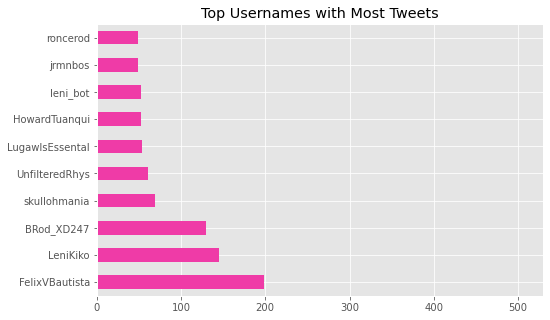

In [81]:
all_tweets_df["Username"].value_counts().head(10).plot(kind="barh", color="#ef3ba7", 
                                                       title="Top Usernames with Most Tweets", figsize=(8,5))
plt.xlim(0, 530)

<AxesSubplot:title={'center':'Top Verified Profiles with Most Tweets'}>

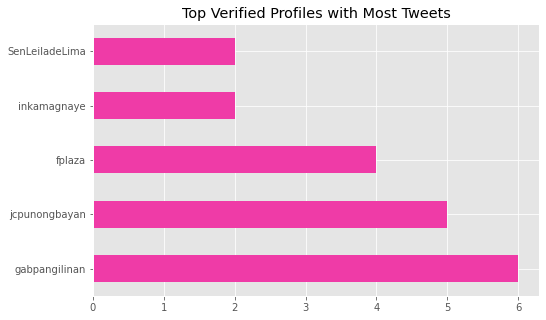

In [66]:
all_tweets_df.loc[all_tweets_df["Verified"] == True, "Username"].value_counts().head(5).plot(kind="barh", color="#ef3ba7", 
                                                                   title="Top Verified Profiles with Most Tweets", figsize=(8,5))

In [11]:
pd.DatetimeIndex(all_tweets_df["AccountCreated"]).year.value_counts().sort_index()

2006       2
2007      88
2008     235
2009    3823
2010    2755
2011    2758
2012    2371
2013    1819
2014    2017
2015    2428
2016    2218
2017    2556
2018    3292
2019    3333
2020    6765
2021    7861
Name: AccountCreated, dtype: int64

([<matplotlib.axis.XTick at 0x26b1c47d8b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

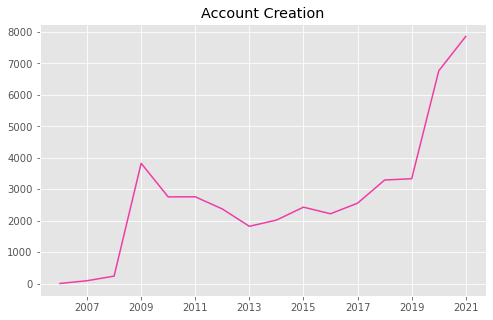

In [67]:
pd.DatetimeIndex(all_tweets_df["AccountCreated"]).year.value_counts().sort_index().plot(color="#ef3ba7", 
                                                                                        title="Account Creation",
                                                                                        figsize=(8,5))
plt.xticks([2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021])

## Criteria Initialization
- Tweet from 2021-10-04 to 2021-10-09
- Hashtag #LetLeniLead is used
- Number of Following is greater than number of Followers
- Account created after 2018
- Number of Followers less than 100
- Account not Verified

In [13]:
criteria = (all_tweets_df["Following"] > all_tweets_df["Followers"]) & (pd.DatetimeIndex(all_tweets_df["AccountCreated"]).year > 2018) & (all_tweets_df["Followers"] < 100) & (all_tweets_df["Verified"] == False)

criteria_df = all_tweets_df.loc[criteria]

In [14]:
criteria_df

,Unnamed: 0,Datetime,Text,Language,Username,Verified,AccountCreated,Followers,Following,MentionedUsers
10,10,2021-10-04 22:41:51+00:00,#LetLeniLead 💜💖,und,KikoCann,False,2021-10-04 22:28:29+00:00,0,35,NaN
19,19,2021-10-04 22:21:00+00:00,@ALTiWantTFC kailangan yung hindi muna corrupt...,tl,emperor_gorio,False,2021-09-02 04:08:10+00:00,16,682,"[User(username='ALTiWantTFC', id=1297781822613..."
30,30,2021-10-04 21:49:59+00:00,This has been around my wrist since 2015! @len...,en,NengHip,False,2021-03-27 17:53:05+00:00,32,163,"[User(username='lenirobredo', id=47211842, dis..."
35,35,2021-10-04 21:13:19+00:00,#DapatSiLeni\n#LetLeniLead\n#KayLeniTayo\n#Rob...,und,SZudee,False,2021-01-11 03:24:13+00:00,11,75,NaN
38,38,2021-10-04 20:27:01+00:00,Paano na si @yorme e Facebook lng nag pasikat ...,tl,swallowace,False,2021-05-22 16:31:05+00:00,36,766,"[User(username='YOrme', id=3409209965, display..."
...,...,...,...,...,...,...,...,...,...,...
44311,44311,2021-10-08 00:01:08+00:00,aga aga pa wag niyo sinusubukan palibhasa mga ...,tl,ssunschaser,False,2021-04-29 13:35:41+00:00,76,178,NaN
44312,44312,2021-10-08 00:01:04+00:00,#LabanLeni2022 \n#LetLeniLead \n#DapatSiLeni \...,tl,tina_dhana,False,2019-05-26 01:10:04+00:00,3,19,NaN
44314,44314,2021-10-08 00:00:59+00:00,"Suportahan, hindi sambahin.\n#LetLeniLead",tl,zhiremiguel,False,2021-01-02 06:27:26+00:00,73,115,NaN
44317,44317,2021-10-08 00:00:24+00:00,And when the broken-hearted people living in t...,en,an_bookworm,False,2021-07-12 14:35:46+00:00,16,82,NaN


## Criteria-based Analysis

([<matplotlib.axis.XTick at 0x26b10ca74c0>,
 [Text(0, 0, 'Oct. 4'),
  Text(1, 0, 'Oct. 5'),
  Text(2, 0, 'Oct. 6'),
  Text(3, 0, 'Oct. 7'),
  Text(4, 0, 'Oct. 9')])

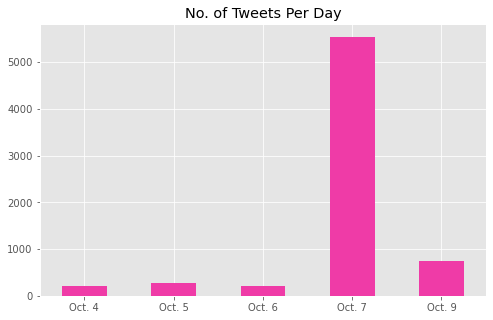

In [68]:
pd.DatetimeIndex(criteria_df["Datetime"]).day.value_counts().sort_index().plot(kind="bar", color="#ef3ba7", 
                                                                                 title="No. of Tweets Per Day", figsize=(8,5))
plt.xticks(ticks=range(5), labels=["Oct. 4", "Oct. 5", "Oct. 6", "Oct. 7", "Oct. 9"], rotation=0)

(0.0, 185.0)

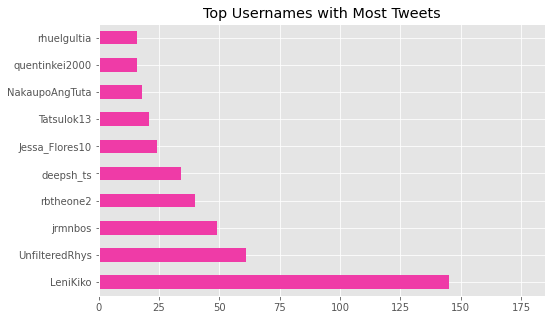

In [69]:
criteria_df["Username"].value_counts().head(10).plot(kind="barh", color="#ef3ba7", 
                                                       title="Top Usernames with Most Tweets", figsize=(8,5))
plt.xlim(0, 185)

## WordCloud - Most used words & hashtags (Whole)

In [17]:
import nltk
from nltk.tokenize import word_tokenize

all_words = []

for i in all_tweets_df["Text"]:
    tokenized_words = word_tokenize(i)
    for w in tokenized_words:   
        all_words.append(w.lower())

In [18]:
from nltk.corpus import stopwords

fil_stopwords = ["akin","aking","ako","alin","am","amin","aming","ang","ano","anumang","apat","at","atin","ating","ay","bababa","bago","bakit","bawat","bilang","dahil","dalawa","dapat","din","dito","doon","gagawin","gayunman","ginagawa","ginawa","ginawang","gumawa","gusto","habang","hanggang","hindi","huwag","iba","ibaba","ibabaw","ibig","ikaw","ilagay","ilalim","ilan","inyong","isa","isang","itaas","ito","iyo","iyon","iyong","ka","kahit","kailangan","kailanman","kami","kanila","kanilang","kanino","kanya","kanyang","kapag","kapwa","karamihan","katiyakan","katulad","kaya","kaysa","ko","kong","kulang","kumuha","kung","laban","lahat","lamang","likod","lima","maaari","maaaring","maging","mahusay","makita","marami","marapat","masyado","may","mayroon","mga","minsan","mismo","mula","muli","na","nabanggit","naging","nagkaroon","nais","nakita","namin","napaka","narito","nasaan","ng","ngayon","ni","nila","nilang","nito","niya","niyang","noon","o","pa","paano","pababa","paggawa","pagitan","pagkakaroon","pagkatapos","palabas","pamamagitan","panahon","pangalawa","para","paraan","pareho","pataas","pero","pumunta","pumupunta","sa","saan","sabi","sabihin","sarili","sila","sino","siya","tatlo","tayo","tulad","tungkol","una","walang"]

eng_stopwords = stopwords.words("english")

# removed # to include hashtags
special_chars = [".", ",", "!", "@", "%", "&", "*", "(", ")", "'", '""', "+", "=", "-", ";", ":", "?", "’", "'s", "...",
                 "https", "t", "co", "t co", "https t"]

In [74]:
all_words2 = []

for word in all_words:
    if (word in fil_stopwords) or (word in eng_stopwords) or (word in special_chars) or (word.startswith("/")):
        continue
    all_words2.append(word)

In [75]:
all_in_sentence = ""

for w in all_words2:
    all_in_sentence += w + " "
    
# all_in_sentence 

(-0.5, 799.5, 399.5, -0.5)

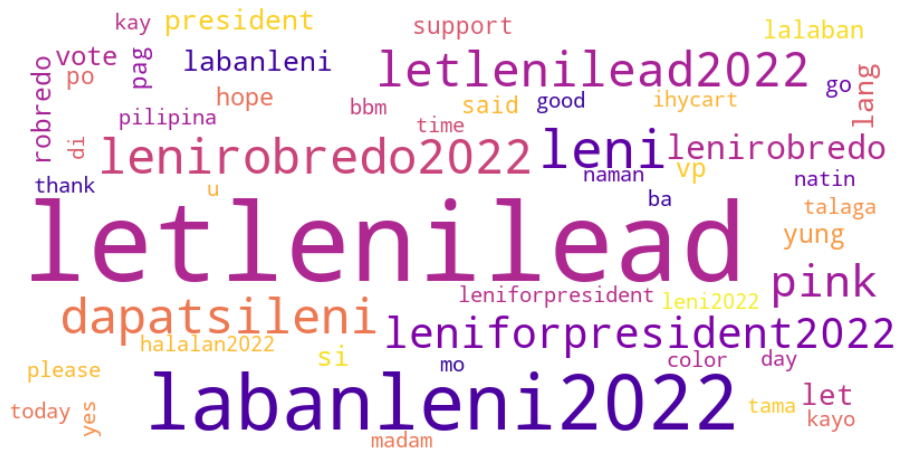

In [83]:
from wordcloud import WordCloud

word_cloud = WordCloud(width=800, height=400, background_color="white", max_words=50, 
                       stopwords=[], collocations=False, colormap="plasma").generate(all_in_sentence)
plt.figure(figsize=(16,12))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")

## WordCloud - Most mentioned users (Whole)

In [38]:
from snscrape.modules.twitter import User

all_mentioned = []


for i in all_tweets_df["MentionedUsers"].fillna(0):
    if i == 0:
        continue
    
    all_mentioned.append(eval(i)[0].username)
    print(eval(i)[0].username)

gmanews
lenirobredo
NaniRombi
nathancasabuena
zoren_meikodo
ALTiWantTFC
Justinologist
VPPilipinas
lenirobredo
lenirobredo
VPPilipinas
gmanews
NaniRombi
YOrme
NaniRombi
Dens31793589
TheManilaTimes
lenirobredo
NaniRombi
chris03859926
lenirobredo
DapatSiLeni
DapatSiLeni
ABSCBNNews
elybuendia9001
NaniRombi
TxtdariHI
PinoyAkoBlog
DapatSiLeni
lenirobredo
lenirobredo
inquirerdotnet
elybuendia9001
obladdiobladdah
Richeydarian
lenirobredo
lenirobredo
NaniRombi
dawende
yellowunicorn88
taylorswift13
mybenchbody737
kalakumag
rapplerdotcom
NaniRombi
NaniRombi
Pepsicollagen
akireiven
NaniRombi
MarkjHalim
dawende
NaniRombi
alvinelchico
NaniRombi
alvinelchico
alvinelchico
elybuendia9001
Dwarrior_granny
lakwatsarah
NaniRombi
futurenursejose
rapplerdotcom
QueenHellaaa
QueenHellaaa
bamaquino
NaniRombi
KTpuneraTweets
NaniRombi
dawende
rapplerdotcom
KapamilyaVote
dawende
msans2020
disisdadave
mcneilamandy
zacharizard
the1ein
pogitahhhh
Ms_Trizzia_
BIENsays
sarahroyalty25
BIENsays
leeseokminized_
FedicTheGr

ihycart
lenirobredo
ihycart
bbomeurong
aynbernos
ihycart
DionPorcy
julesguiang
dawende
wtfjade
avijoonsells
MrFrankBaraan
avijoonsells
ardygganbu
bitemegenesis
RickRoss
lenirobredo
imacristina_
inquirerdotnet
lenirobredo
sumshine013
c_waengyu
surfkv
agot_isidro
ihycart
gabpangilinan
jabberwacky_
ihycart
ihycart
bondelledaily
lenirobredo
inquirerdotnet
imakoys
Doc4Dead
bamaquino
bbononcart
teamrobredoph
clister_art
anjo_bagaoisan
ItsjaysL
pauloMDtweets
ChelDiokno
lenirobredo
_japalcantara
lenirobredo
BetsinsOfficial
JYPETWICE
ursiomaitype
lenirobredo
rapplerdotcom
PaulinoChan_
lenirobredo
lenirobredo
syd_swish
jinri_88
Paps_Caloy
SbMoo19
lenirobredo
ihycart
lenirobredo
cartnirima
rapplerdotcom
KapitanaCarol
lenirobredo
prodeeboy
sarangheBangtan
cartnirima
manilaluzon
jiiiiim__
heyquinnyboo
sarangheBangtan
sarangheBangtan
ArianaGrande
lenirobredo
lenirobredo
avrghomosapien
IHateFakePple
avijoonsells
lakwatsarah
sarangheBangtan
ANCALERTS
maycarealino
avijoonsells
MMakilingggg
lenirobredo


BBMAKO23
mscleazorel
Chris_404_p
puzzledbuilder
cutieee_wins
mscleazorel
ninyamikhaela
Eraserheads
lenirobredo
enna_orbe
jahsnyx
arjei26
VPPilipinas
bamaquino
teaekswoon
lenirobredo
lenirobredo
lenirobredo
jayardm
ebedancel
lenirobredo
inquirerdotnet
lenirobredo
kenisetgmcrz
layzhang
McJorick
dlpnrubyhope
Absolutalbert
PLDT_Cares
ursiomaitype
treasuremembers
ENHYPEN_members
rapplerdotcom
lenirobredo
nah_deej
YamahaMotorPH
Twitter
sandromarcos7
docligot
ABSCBNNews
avijoonsells
riverswan
crystalbhytes
avijoonsells
ebedancel
KiannaDy
ihycart
SbMoo19
ramboreports
jcpunongbayan
lenirobredo
rapplerdotcom
ihycart
avijoonsells
lenirobredo
ihycart
armanddavid86
BoomBuencamino
lenirobredo
_SUTANGH00N
lenirobredo
nah_deej
lilyganados
ihycart
lenirobredo
yobruugghh
jcpunongbayan
msmeg_06
kamiiiww
KrisAquinoWORLD
avijoonsells
lenirobredo
lenirobredo
LaurenJauregui
rezhouicehehez_
lenirobredo
cartnirima
heynikkipoo
lenirobredo
SB19XATINS
lenirobredo
__chae_
lenirobredo
nah_deej
wyethwim
LheysanpI
ci

namkoocart
ihycart
sunooluvoml
lizasoberano
jepppoooyyy
bellemariano02
seungcuddIes
lenirobredo
qttalaganileah
SbMoo19
SbMoo19
inquirerdotnet
patrickcyle
6112cart
KorekKaJohn
kwaylayt
lenirobredo
MrFrankBaraan
yohansiee
lenirobredo
SbMoo19
inquirerdotnet
SbMoo19
SbMoo19
dosvedddanya_
MyJaps
rapplerdotcom
lenirobredo
nah_deej
lenirobredo
ihycart
SbMoo19
ihycart
ihycart
just_tyr1
elybuendia9001
lenirobredo
jamesharoldeu
GOTYJ_Ars_Vita
ihycart
_djchacha
SbMoo19
lenirobredo
lenirobredo
lenirobredo
lenirobredo
lenirobredo
SbMoo19
ENHYPEN_members
lenirobredo
Barbie
ihycart
Chaamonster
DadSouthwoods
barrygutierrez3
elybuendia9001
lenirobredo
seviencamero
Morenhoe
lenirobredo
xiuminonlyfans
elijahcanlas_
kdramagod
datotherjohn
lenirobredo
ihycart
beeyotchWP
EFFFaquino
guccivantae95
ihycart
smuggledones
ihycart
EhJhie21
annecurtissmith
aikarobredo
DionneMonsanto
TrillanesSonny
lenirobredo
lenirobredo
Lisztimania
ihycart
p0tat0balls
jnlfrdo
ihycart
KPOPSTANS4LENI
lizasoberano
ihycart
ihycart
ihy

0326haul
ihycart
JemuelleTapel
dani_prikisuk
6112cart
MyJaps
jnrnsoocart
ihycart
IskoMoreno
bamaquino
lenirobredo
bamaquino
lenirobredo
0326haul
lenirobredo
misayeon
IskoMoreno
BINI_ph
lenirobredo
MyJaps
sefnatividad
MarengIone
lenirobredo
ihycart
acelight_
ihycart
YouTube
ihycart
KrnozineA
ihycart
mjfelipe
RaceDarwin
laraquigaman
yooongismirk
drenchedjm
allurekorea
ihycart
wonderingscout
gabpangilinan
xiuminonlyfans
lenirobredo
joiceeeeez
ramboreports
tech_vito
iamandiabaya
keshlenggg
starbucksph
0326haul
jmnsource
BTS_twt
jannaforbangtan
prodeeboy
yomattyu
chaelinCL
ursiomaitype
lenirobredo
imJCAlcantara
LloydCadena
sushijisung
6112cart
lenirobredo
beemyhope_twt
LakasNgTimog
6112cart
Espabuddy062984
lenirobredo
lenirobredo
ihycart
ihycart
TrillanesSonny
lenirobredo
IskoMoreno
0326haul
sushijisung
lenirobredo
donjose24
lenirobredo
ITZYofficial
ihycart
Itssassagurl
ElisaMarieSerr2
6112cart
inkamagnaye
unnieversity
ihycart
inquirerdotnet
6112cart
ihycart
darymianne
KrisAquinoWORLD
julia

0326haul
ihycart
ihycart
_beadel
lenirobredo
tynegav
raissawriter
jmphixo
ihycart
ATM0980
elybuendia9001
0326haul
tynegav
_beadel
laraquigaman
jamesxraj
esportsreptar
MissLaLaRi
ULTIMATE_LQFANB
ursiomaitype
gwyomi
_beadel
ihycart
OlliDomz
lenirobredo
6112cart
ABSCBNNews
ihycart
lenirobredo
lenirobredo
ricci_richy
grmrcmp9
IskoMoreno
ArianaGrande
RomanArt031
TwitterPH
lenirobredo
0326haul
jaeyoonhauls
ursiomaitype
lenirobredo
ursiomaitype
OlliDomz
Sehun1BV
ursiomaitype
lenirobredo
DojaCat
AlyssaAshleyC
ihycart
paoloamores
ursiomaitype
lenirobredo
rkbagatsing
ihycart
ursiomaitype
EXCEL_ODDS
cafechimmy
bulletdumas
lenirobredo
SenLeiladeLima
ihycart
lncaimg
ihycart
ursiomaitype
ihycart
ihycart
ihycart
lenirobredo
jinxkv
HYBEINSIGHTtwt
0326haul
OlliDomz
SpaceToSpacePH
jeongucart
lenirobredo
ihycart
reinansabas06
cafechimmy
cafechimmy
cafechimmy
RainmakerAgain
lenirobredo
ihycart
not_your_chic
_pikajichu
ihycart
ihycart
ihycart
PinoyAkoBlog
IskoMoreno
lenirobredo
lenirobredo
hugsforTaehyung


lenirobredo
momotozakis
lenirobredo
hanzaalmazan
tippydossantos8
matt_veslino
elybuendia9001
lenirobredo
iALAByou
_uniquecharlene
ABSCBNNews
majoybaron
RBW_MAMAMOO
_pikajichu
lenirobredo
lenirobredo
DojaCat
lenirobredo
lenirobredo
medstudentcares
Ellantrophy
lenirobredo
smolhyejinn
zielserrano
lenirobredo
CedVanguardia_
gobituin
ITZYofficial
Juls_Laban
lenirobredo
tuanmxciii
pepita_manaloto
pauljoseph0677
ABSCBNNews
lenirobredo
lenirobredo
YourAnneCortez
oursvns
treasuremembers
loooveissah
saabmagalona
Exped_hp
santongbusabos
ArianaGrande
fanboytwts
MyJaps
lenirobredo
rawrkathniel
Twitter
lenirobredo
lenirobredo
xialbedo_
Jun_Neri
feleacity
insatiabyul
lenirobredo
ahyindelacruz
signaltofu
lenirobredo
meryeldls
lenirobredo
QUENHOPEFOREVER
saabmagalona
c0rporateslave
lenirobredo
ABSCBNNews
lenirobredo
bernallllll
KevinKalbo
lenirobredo
realmicic2
vcenzow
lenirobredo
lenirobredo
143redangel
lenirobredo
lenirobredo
lenirobredo
jaeceelim
IskoMoreno
lenirobredo
lenirobredo
van_bora7
elybuend

jsprmr
lenirobredo
lenirobredo
lenirobredo
zzzzemog
ttenscart
piqueroberos
lenirobredo
DapatSiLeni
chittasuhcart
ffdom_
ANCALERTS
143redangel
lenirobredo
ANCALERTS
anxagittarius
Shum214
Tatsulok13
RVsmtown
News5PH
sb19kenvester
VPPilipinas
ABSCBNNews
lenirobredo
inquirerdotnet
kaorystalized
rapplerdotcom
lenirobredo
Starksterrr
theTEENstagram
lenirobredo
moonstar88band
elybuendia9001
lenirobredo
inquirerdotnet
VPPilipinas
inquirerdotnet
overtinkerbelle
lenirobredo
KelvinCasamayor
ppkomabango
KB08_
cnnphilippines
lenirobredo
julesguiang
bbibbiryuryu
cnnphilippines
bellacioszo
lenirobredo
yeojumaquio
VeninPromotes
lakwatsarah
BTS_twt
pelikulamania
lenirobredo
TrillanesSonny
kbrosas
VPPilipinas
lenirobredo
yeshadarling
gungrexlvrz
_pikajichu
Mai_Rodrigz
TrillanesSonny
lenirobredo
elybuendia9001
lenirobredo
arabacahin
lenirobredo
lenirobredo
MichaelManangu
ABSCBNNews
lenirobredo
stanleygajete
PinoyAkoBlog
abyssmoon7
cnnphilippines
EnzoDeBorja
TrillanesSonny
gmanews
pattiechoo
lenirobredo
l

_jowmel
ihycart
sarangheBangtan
ccupjakes_xd
officialmaryaph
pseudosofia
naathalielouise
ch_ck31
hericksoninsis
rapplerdotcom
LeodyManggagawa
inquirerdotnet
iammevianmae
inquirerdotnet
kimpoyfeliciano
navigator0525
Yelle007
kristelasilom
sychoiofficial
Nniikkaayyy
inquirerdotnet
maydonisreal
MaamSyj
hsinwei_simp
cartnirima
sleepysaurusss
senmiriam
lenirobredo
agustangerines
vicegandako
weyesmawie
orjyyyyy
56audrey57
slayingminsi
MarchingHere
lenirobredo
MackinleyZamora
IskoMoreno
DavaoforLeni
PhilippineStar
DeeJayBee42
MillenialIndio
aespabbl
tattaojozel
nah_deej
lenirobredo
Richardeng_
http_juneee
ABSCBNNews
vhenchfulspirit
onegai_ph
sarangheBangtan
IOUD0IE
__chae_
penlab_ink
christiangultz
IskoMoreno
piaranada
nxpbaby
birdieeYez
onegai_ph
1Sambayan
__chae_
ursiomaitype
reynaarcilla
VPPilipinas
iristaaffeite
officialmaryaph
mariaressa
iamRaoulManuel
llaurenceadrian
aliah_althea
BicolUofficial
lenirobredo
santimags3
10260530S
BTS_twt
parokyaniedgar
infectious_dx
SCMPAsia
lenirobredo
ge

In [41]:
all_tweets_df["MentionedUsers"].fillna(0)[19]

"[User(username='ALTiWantTFC', id=1297781822613528576, displayname='alt iWantTFC \\uea00 #LabanLeni2022', description=None, rawDescription=None, descriptionUrls=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, linkUrl=None, linkTcourl=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"

In [42]:
eval(all_tweets_df["MentionedUsers"].fillna(0)[19])

[User(username='ALTiWantTFC', id=1297781822613528576, displayname='alt iWantTFC \uea00 #LabanLeni2022', description=None, rawDescription=None, descriptionUrls=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, linkUrl=None, linkTcourl=None, profileImageUrl=None, profileBannerUrl=None, label=None)]

In [43]:
eval(all_tweets_df["MentionedUsers"].fillna(0)[19])[0].username

'ALTiWantTFC'

In [44]:
all_in_mentioned = ""

for w in all_mentioned:
    all_in_mentioned += w + " "

all_in_mentioned

'gmanews lenirobredo NaniRombi nathancasabuena zoren_meikodo ALTiWantTFC Justinologist VPPilipinas lenirobredo lenirobredo VPPilipinas gmanews NaniRombi YOrme NaniRombi Dens31793589 TheManilaTimes lenirobredo NaniRombi chris03859926 lenirobredo DapatSiLeni DapatSiLeni ABSCBNNews elybuendia9001 NaniRombi TxtdariHI PinoyAkoBlog DapatSiLeni lenirobredo lenirobredo inquirerdotnet elybuendia9001 obladdiobladdah Richeydarian lenirobredo lenirobredo NaniRombi dawende yellowunicorn88 taylorswift13 mybenchbody737 kalakumag rapplerdotcom NaniRombi NaniRombi Pepsicollagen akireiven NaniRombi MarkjHalim dawende NaniRombi alvinelchico NaniRombi alvinelchico alvinelchico elybuendia9001 Dwarrior_granny lakwatsarah NaniRombi futurenursejose rapplerdotcom QueenHellaaa QueenHellaaa bamaquino NaniRombi KTpuneraTweets NaniRombi dawende rapplerdotcom KapamilyaVote dawende msans2020 disisdadave mcneilamandy zacharizard the1ein pogitahhhh Ms_Trizzia_ BIENsays sarahroyalty25 BIENsays leeseokminized_ FedicTheG

(-0.5, 799.5, 399.5, -0.5)

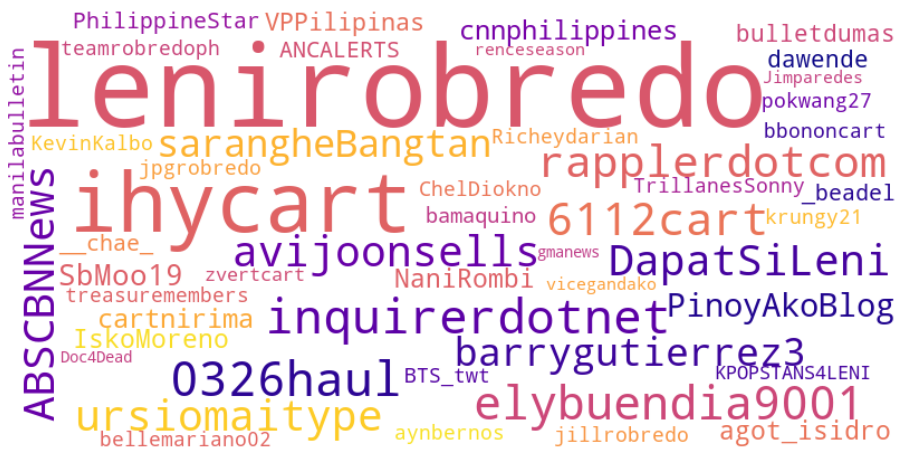

In [62]:
from wordcloud import WordCloud

word_cloud = WordCloud(width=800, height=400, background_color="white", max_words=50, 
                       stopwords=[], collocations=False, colormap="plasma").generate(all_in_mentioned)
plt.figure(figsize=(16,12))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")

In [58]:
WordCloud?